## Pozo infinito: verificar que $\psi(x) = \sin(\pi x)$ es solución de la ecuación de Schrödinger, usando diferencias finitas

La ecuación de Schrödinger 1D independiente del tiempo está dada por:
$$
     - (\hbar² / 2m) \psi''(x) + V(x) \psi(x) = E \psi(x)
$$
En el caso del pozo cuadrado infinito en $0 < x < L$, con $V(x) = 0$:
$$
   \psi''(x) = - (2m / \hbar^2) E \hbar(x)
$$

### Solución analítica: 

La solución analítica a este problema (eigenfunciones y eigenenergías) es:
$$
\psi_n(x) = \sqrt(2/L) sin(n\pi x/L),     E_n = (n^2\pi ^2 \hbar^2)/(2mL^2)
$$

Verificaremos este resultado para n = 1 y L = 1, usando diferencias finitas

In [6]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append("../metodos")
from libMetodos import segundaDerivadaCentrada

In [18]:
# Por simplicidad tomamos ħ = m = 1
L = 1.0
hbar = 1.0
m = 1.0
n = 1
E = (n**2 * np.pi**2 * hbar**2) / (2 * m * L**2)

# Dominio sobre x
N = 1000
x = np.linspace(0, L, N)
h = x[1] - x[0]

In [15]:
# Solución analitica
psi = lambda x: np.sin(n * np.pi * x / L)

# Calcular segunda derivada numerica en puntos interiores, porque diferencias centradas no es valida en frontera
psiNumerica = []
x_interior = x[1:-1]  # ignorar los extremos para diferencias centradas

for xi in x_interior:
    d2psi = segundaDerivadaCentrada(psi, xi, h)
    psiNumerica.append(d2psi)

psiNumerica = np.array(psiNumerica)
psi_interior = psi(x_interior)

# Evaluar lados de la ecuacion de Schrödinger
lhs = - (hbar**2 / (2 * m)) * psiNumerica
rhs = E * psi_interior

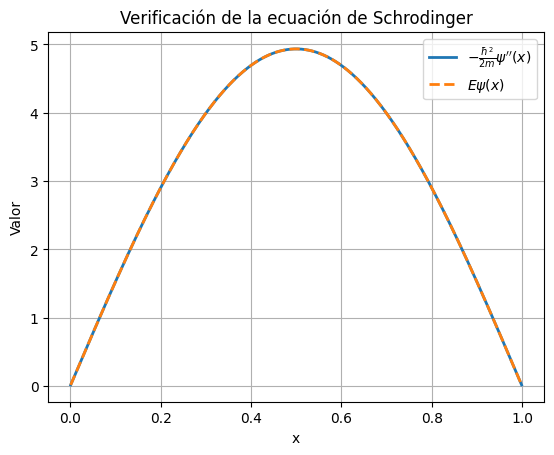

In [16]:
# Graficar cumplimiento de igualdad de la ecuacion
plt.plot(x_interior, lhs, label=r"$-\frac{\hbar^2}{2m} \psi''(x)$", linewidth=2)
plt.plot(x_interior, rhs, '--', label=r"$E \psi(x)$", linewidth=2)
plt.title("Verificación de la ecuación de Schrodinger")
plt.xlabel("x")
plt.ylabel("Valor")
plt.legend()
plt.grid()
plt.show()


In [17]:
# Error cuadrático medio
error = np.mean((lhs - rhs)**2)
print(f"Error cuadrático medio: {error:.2e}")

Error cuadrático medio: 8.28e-12


Plantear la expresión de diferencias finitas centradas para la segunda derivada en la ecuación de Schrödinger unidimensional permite reformularla como un problema de autovalores y autofunciones. La resolución de la ecuación desde esta perspectiva se desarrolla con mayor detalle en el notebook `qr.ipynb`.